In [7]:
# Inportação dos dados da lojas

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [8]:
# Calculando o lucro total(faturamento)
fat1 = loja["Preço"].sum()
fat2 = loja2["Preço"].sum()
fat3 = loja3["Preço"].sum()
fat4 = loja4["Preço"].sum()

print(f"Lucro da loja 1: R$ {fat1:.2f}")
print(f"Lucro da loja 2: R$ {fat2:.2f}")
print(f"Lucro da loja 3: R$ {fat3:.2f}")
print(f"Lucro da loja 4: R$ {fat4:.2f}")

Lucro da loja 1: R$ 1534509.12
Lucro da loja 2: R$ 1488459.06
Lucro da loja 3: R$ 1464025.03
Lucro da loja 4: R$ 1384497.58


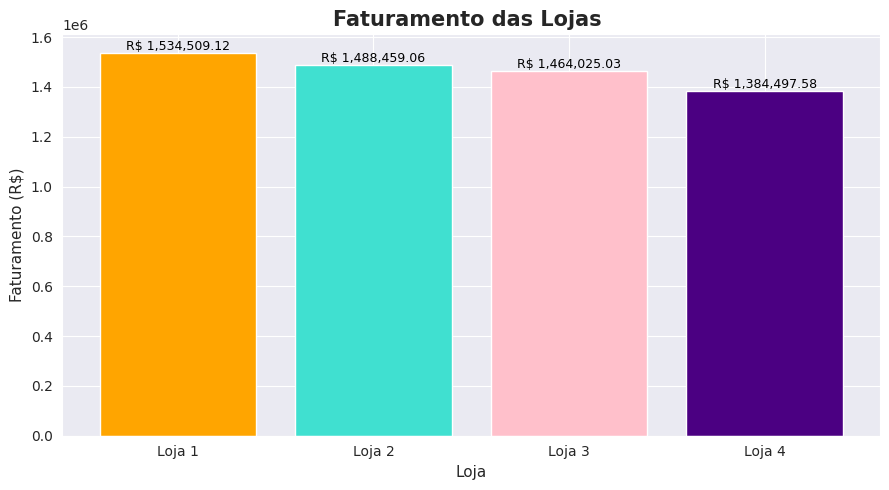

In [14]:
# Importação da biblioteca
import matplotlib.pyplot as plt
import seaborn as sns


# Dados de faturamento
df_faturamento = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [fat1, fat2, fat3, fat4]
})
# Estilo
sns.set_style("darkgrid")
plt.figure(figsize=(9, 5))

# Cores de Divertidamente 2
cores = ["#FFA500","#40E0D0","#FFC0CB","#4B0082"]

# Gráfico com plt.bar
plt.bar(df_faturamento["Loja"], df_faturamento["Faturamento"], color=cores)

# Título
plt.title("Faturamento das Lojas ", fontsize=15, weight='bold')
plt.xlabel("Loja", fontsize=11)
plt.ylabel("Faturamento (R$)", fontsize=11)

# Rótulos com os valores
for i, valor in enumerate(df_faturamento["Faturamento"]):
    plt.text(i, valor + 200, f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=9, color='black')

# Layout
plt.tight_layout()
plt.show()

In [16]:
# Categorias pela quantidade de vendas

def imprimir_vendas_por_categoria(loja_df, nome_loja):
    contagem = Counter(loja_df['Categoria do Produto'])
    categorias_ordenadas = sorted(contagem.items(), key=lambda x: x[1], reverse=True)

    print(f"Resumo de Vendas por Categoria - {nome_loja}\n")
    print(f"{'Categoria':<26}{'Quantidade':>10}")
    print("-" * 36)

    for categoria, quantidade in categorias_ordenadas:
        print(f"{categoria:<26}{quantidade:>10} vendas")
    print("\n")

imprimir_vendas_por_categoria(loja, "Loja 1")
imprimir_vendas_por_categoria(loja2, "Loja 2")
imprimir_vendas_por_categoria(loja3, "Loja 3")
imprimir_vendas_por_categoria(loja4, "Loja 4")



Resumo de Vendas por Categoria - Loja 1

Categoria                 Quantidade
------------------------------------
moveis                           465 vendas
eletronicos                      448 vendas
brinquedos                       324 vendas
eletrodomesticos                 312 vendas
esporte e lazer                  284 vendas
instrumentos musicais            182 vendas
livros                           173 vendas
utilidades domesticas            171 vendas


Resumo de Vendas por Categoria - Loja 2

Categoria                 Quantidade
------------------------------------
moveis                           442 vendas
eletronicos                      422 vendas
brinquedos                       313 vendas
eletrodomesticos                 305 vendas
esporte e lazer                  275 vendas
instrumentos musicais            224 vendas
livros                           197 vendas
utilidades domesticas            181 vendas


Resumo de Vendas por Categoria - Loja 3

Categoria            

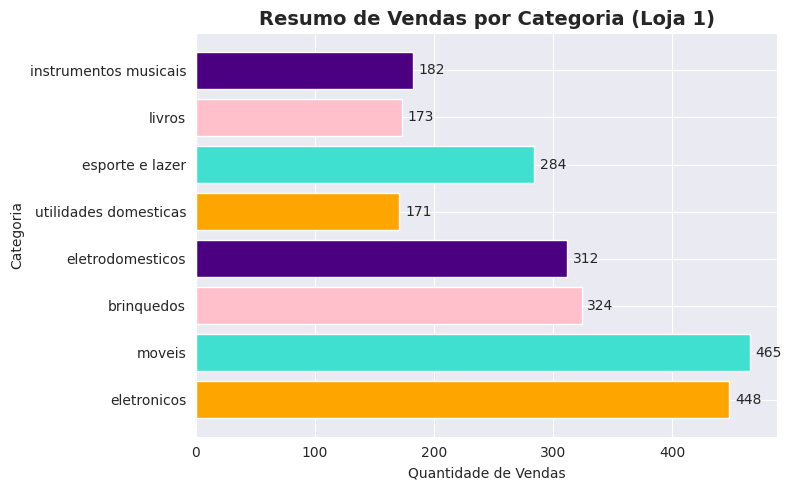

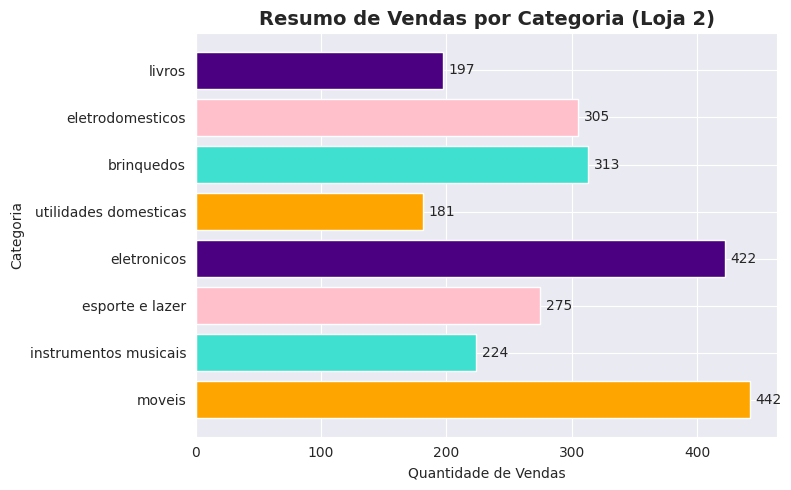

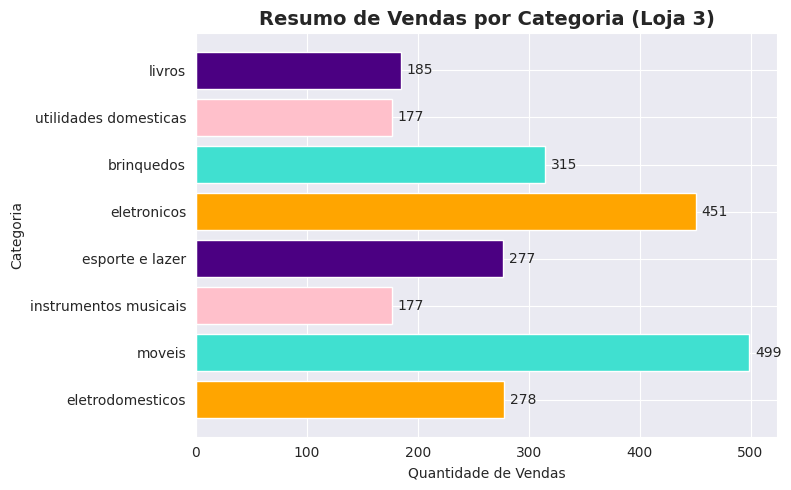

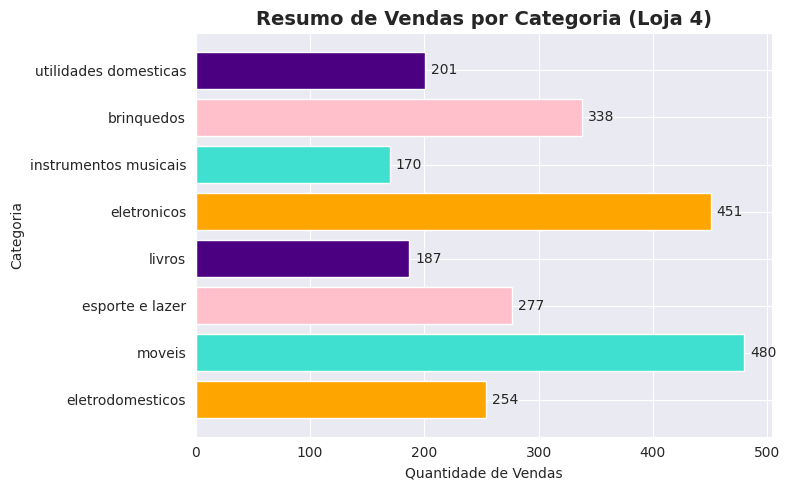

In [21]:
# Gráficos de barras mostrando a quantidade de vendas por categoria de cada loja
from collections import Counter
import matplotlib.pyplot as plt

# Contadores de categorias
quantidade_categoria = Counter(loja['Categoria do Produto'])
quantidade_categoria2 = Counter(loja2['Categoria do Produto'])
quantidade_categoria3 = Counter(loja3['Categoria do Produto'])
quantidade_categoria4 = Counter(loja4['Categoria do Produto'])

# Paleta de cores DivertidaMente 2 (Ansiedade, Inveja, Vergonha, Tédio)
cores = ['#FFA500', '#40E0D0', '#FFC0CB', '#4B0082']

def plotar_vendas_categoria_barh(quantidade_categoria, titulo, cores):
    categorias = list(quantidade_categoria.keys())
    quantidades = list(quantidade_categoria.values())

    plt.figure(figsize=(8, 5))
    bars = plt.barh(categorias, quantidades, color=cores[:len(categorias)])
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Categoria')

    # Mostrar valores ao lado das barras
    for bar in bars:
        largura = bar.get_width()
        plt.text(largura + max(quantidades)*0.01, bar.get_y() + bar.get_height()/2,
                 f'{largura}', va='center')

    plt.tight_layout()
    plt.show()

plotar_vendas_categoria_barh(quantidade_categoria, 'Resumo de Vendas por Categoria (Loja 1)', cores)
plotar_vendas_categoria_barh(quantidade_categoria2, 'Resumo de Vendas por Categoria (Loja 2)', cores)
plotar_vendas_categoria_barh(quantidade_categoria3, 'Resumo de Vendas por Categoria (Loja 3)', cores)
plotar_vendas_categoria_barh(quantidade_categoria4, 'Resumo de Vendas por Categoria (Loja 4)', cores)



In [22]:
# Função para calcular a média das avaliações
def media_avaliacoes(loja):
    avaliacoes = loja['Avaliação da compra']
    total = avaliacoes.sum()
    quantidade = len(avaliacoes)
    if quantidade > 0:
        return total / quantidade
    else:
        return 0

print("Média de avaliação da Loja 1:", round(media_avaliacoes(loja), 2))
print("Média de avaliação da Loja 2:", round(media_avaliacoes(loja2), 2))
print("Média de avaliação da Loja 3:", round(media_avaliacoes(loja3), 2))
print("Média de avaliação da Loja 4:", round(media_avaliacoes(loja4), 2))


Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.0


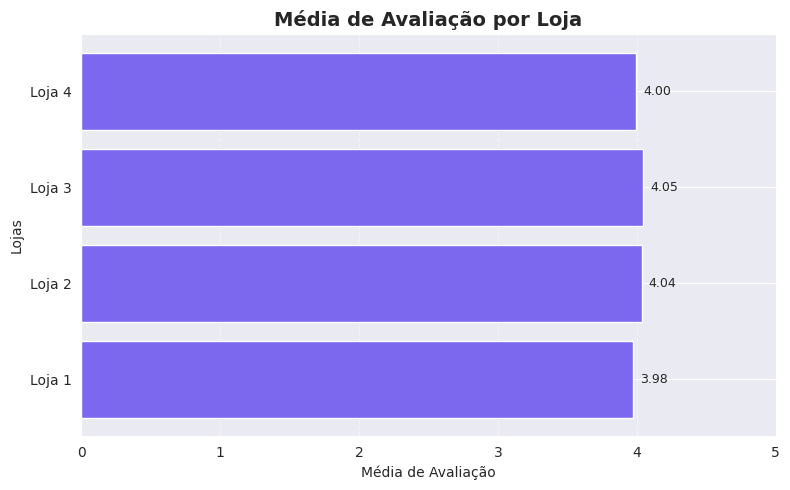

In [26]:
import matplotlib.pyplot as plt

# Função para calcular média da avaliação de uma loja
def media_avaliacao(loja_df):
    avaliacoes = loja_df['Avaliação da compra']
    if len(avaliacoes) > 0:
        return avaliacoes.sum() / len(avaliacoes)
    else:
        return 0

# Supondo que você tenha os dataframes loja, loja2, loja3, loja4 já definidos

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [
    media_avaliacao(loja),
    media_avaliacao(loja2),
    media_avaliacao(loja3),
    media_avaliacao(loja4)
]

plt.figure(figsize=(8, 5))
bars = plt.barh(lojas, medias, color='mediumslateblue')

plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Média de Avaliação')
plt.ylabel('Lojas')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar in bars:
    largura = bar.get_width()
    plt.text(largura + 0.05, bar.get_y() + bar.get_height()/2,
             f'{largura:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()




In [28]:
from collections import Counter

# Produtos vendidos em cada loja
produtos_loja1 = Counter(loja['Produto'])
produtos_loja2 = Counter(loja2['Produto'])
produtos_loja3 = Counter(loja3['Produto'])
produtos_loja4 = Counter(loja4['Produto'])

# Função para mostrar o produto com mais e menos vendas
def resumo_vendas_por_loja(nome_loja, dados_vendas):
    if not dados_vendas:
        print(f"{nome_loja}: Nenhuma venda registrada.")
        return

    produto_top = dados_vendas.most_common(1)[0]
    produto_menos = min(dados_vendas.items(), key=lambda item: item[1])

    print(f"\n📌 {nome_loja}")
    print(f"Mais vendido  -> {produto_top[0]} ({produto_top[1]} vendas)")
    print(f"Menos vendido -> {produto_menos[0]} ({produto_menos[1]} vendas)")

resumo_vendas_por_loja("Loja 1", produtos_loja1)
resumo_vendas_por_loja("Loja 2", produtos_loja2)
resumo_vendas_por_loja("Loja 3", produtos_loja3)
resumo_vendas_por_loja("Loja 4", produtos_loja4)




📌 Loja 1
Mais vendido  -> Micro-ondas (60 vendas)
Menos vendido -> Headset (33 vendas)

📌 Loja 2
Mais vendido  -> Iniciando em programação (65 vendas)
Menos vendido -> Jogo de tabuleiro (32 vendas)

📌 Loja 3
Mais vendido  -> Kit banquetas (57 vendas)
Menos vendido -> Blocos de montar (35 vendas)

📌 Loja 4
Mais vendido  -> Cama box (62 vendas)
Menos vendido -> Guitarra (33 vendas)


In [29]:
from collections import Counter

# Função para calcular a média de frete
def calcular_media_frete(dados_loja):
    fretes = dados_loja['Frete'].tolist()
    if len(fretes) > 0:
        return sum(fretes) / len(fretes)
    else:
        return 0

# Média de frete de cada loja
print("Média de frete por loja:\n")

print(f"Loja 1 → R$ {calcular_media_frete(loja):.2f}")
print(f"Loja 2 → R$ {calcular_media_frete(loja2):.2f}")
print(f"Loja 3 → R$ {calcular_media_frete(loja3):.2f}")
print(f"Loja 4 → R$ {calcular_media_frete(loja4):.2f}")


Média de frete por loja:

Loja 1 → R$ 34.69
Loja 2 → R$ 33.62
Loja 3 → R$ 33.07
Loja 4 → R$ 31.28


🟢 A loja com o menor frete médio é: **Loja 4** com R$ 31.28


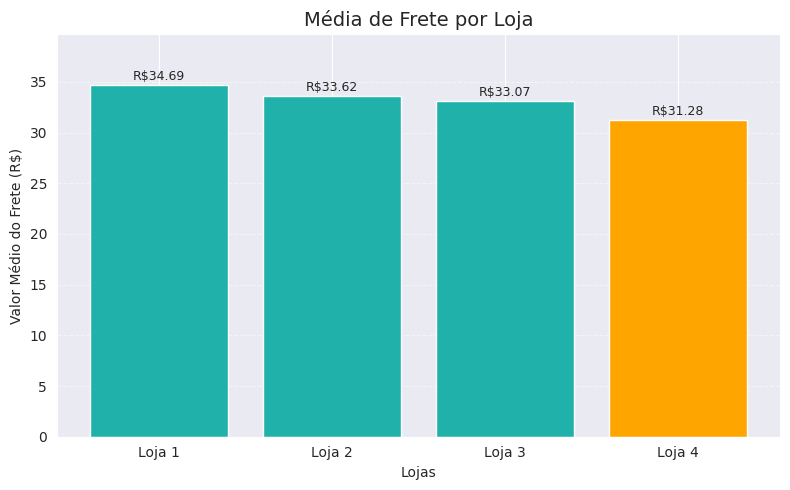

In [32]:
import matplotlib.pyplot as plt

# Lista com os nomes das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Função para calcular a média de frete
def media_frete(loja_df):
    fretes = loja_df['Frete'].tolist()
    if len(fretes) > 0:
        return sum(fretes) / len(fretes)
    else:
        return 0

# Calculando a média de frete de cada loja
medias = [
    media_frete(loja),
    media_frete(loja2),
    media_frete(loja3),
    media_frete(loja4)
]

# Menor valor de frete e da loja
frete_minimo = min(medias)
indice_minimo = medias.index(frete_minimo)
loja_com_menor_frete = lojas[indice_minimo]


print(f"🟢 A loja com o menor frete médio é: **{loja_com_menor_frete}** com R$ {frete_minimo:.2f}")

# Gráfico
plt.figure(figsize=(8, 5))
cores = ['lightseagreen'] * len(lojas)
cores[indice_minimo] = 'orange'

barras = plt.bar(lojas, medias, color=cores)

# Título
plt.title('Média de Frete por Loja', fontsize=14)
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.ylim(0, max(medias) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrando os valores acima das barras
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.5, f'R${valor:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

